In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
import keras
from keras.models import Sequential

import joblib as jb

dehuiwe

In [2]:
data = pd.read_csv(r"C:\Users\amit9\Downloads\Project 2 - Diabetes Data-20230929T083420Z-001\Project 2 - Diabetes Data\Project 2 MeriSKILL\diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# EDA

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
print(f"Number of duplicate entries in the data : {data.duplicated().sum()}")

Number of duplicate entries in the data : 0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploring the Data

In [6]:
data.shape

(768, 9)

In [7]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some of the features present in the data have an mimimum value of 0 such as blood pressure, insulin, skin thickness etc. that cannot be zero in a real case scenario. So the best approch is to remove them.

In [9]:
for i in data.columns:
    if i == "Outcome" or i == 'Pregnancies':
        continue
    else:
        data[i].replace(0, np.nan, inplace = True)

In [10]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
print(f"Distribution of data before removing null values: \n{data['Outcome'].value_counts()}")

Distribution of data before removing null values: 
0    500
1    268
Name: Outcome, dtype: int64


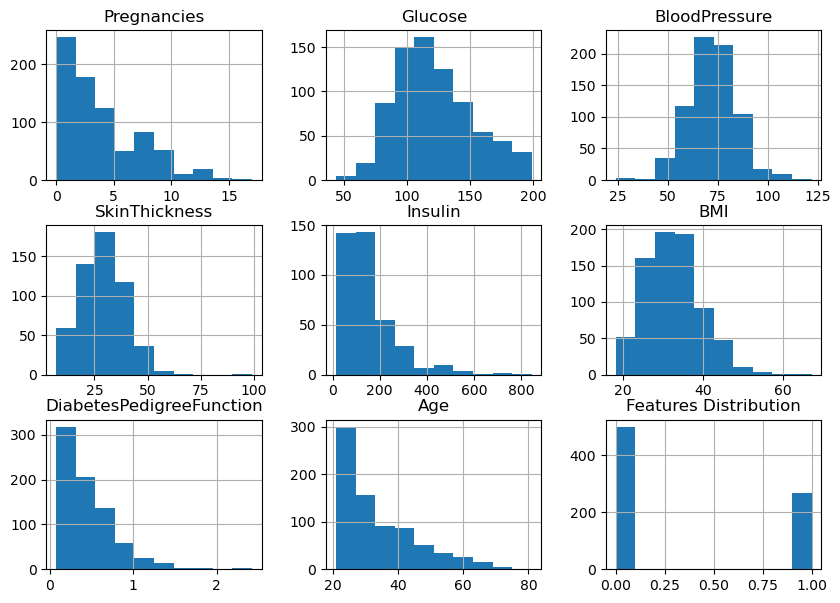

In [12]:
data.hist(figsize = (10, 7), grid = True)
plt.title("Features Distribution")
plt.show()

<Axes: >

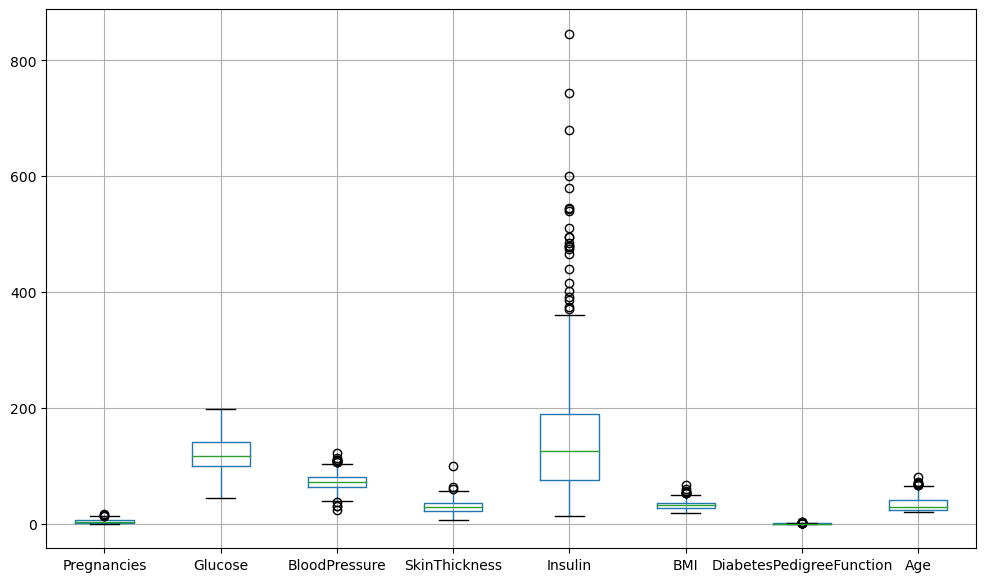

In [13]:
df = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

df.boxplot(figsize = (12, 7))

Except one column "Glucose" all other columns contains outliers.

In [14]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [15]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64

In [16]:
data.fillna(df.median(), inplace = True)

In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


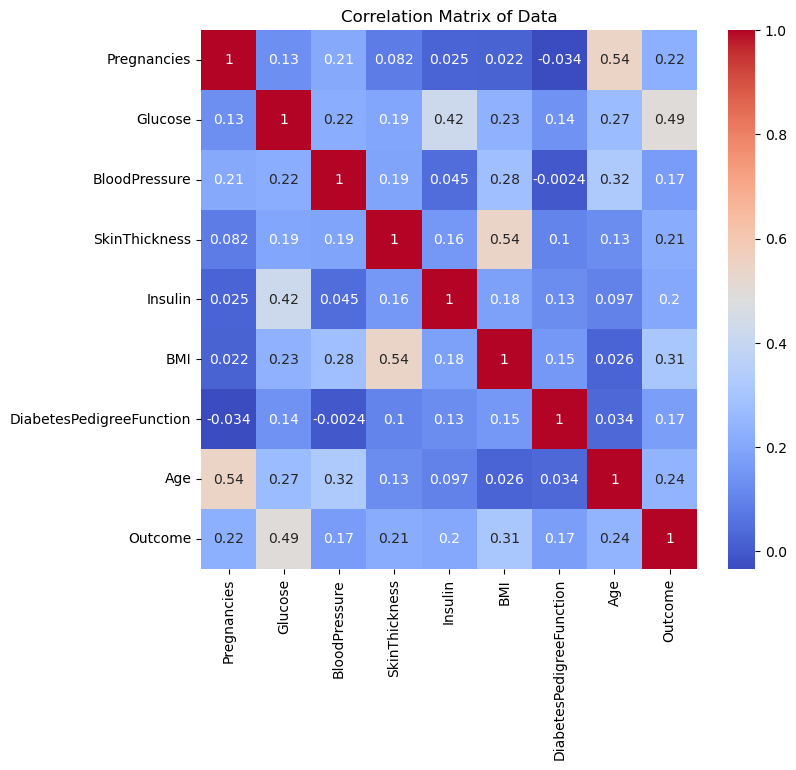

In [19]:
plt.figure(figsize = (8, 7))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix of Data")
plt.show()

# Regularization

In [20]:
temp_df1 = data[data['Outcome'] == 1]
len(temp_df1)

268

In [21]:
temp = data[data['Outcome'] == 0]
temp_df2 = temp[150:419]
len(temp_df2)

269

In [22]:
upd_data = pd.concat([temp_df1, temp_df2], axis  = 0)
upd_data.shape

(537, 9)

In [23]:
upd_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1


In [24]:
upd_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
631,0,102.0,78.0,40.0,90.0,34.5,0.238,24,0
632,2,111.0,60.0,29.0,125.0,26.2,0.343,23,0
633,1,128.0,82.0,17.0,183.0,27.5,0.115,22,0
634,10,92.0,62.0,29.0,125.0,25.9,0.167,31,0
636,5,104.0,74.0,29.0,125.0,28.8,0.153,48,0


# Train Test Split

In [25]:
X = upd_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = upd_data['Outcome']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 15)

In [27]:
y_train.value_counts()

1    228
0    228
Name: Outcome, dtype: int64

# Scaling the features

In [28]:
sc = StandardScaler()
mn = MinMaxScaler(feature_range = (0,1))

In [29]:
x_train_scaled = sc.fit_transform(x_train)

In [30]:
x_test_array = sc.fit_transform(x_test)
y_train = np.asanyarray(y_train)
y_test = np.asanyarray(y_test)

# Machine Learning

In [31]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
clf_rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy')

In [33]:
clf_svm = SVC(kernel = 'linear', C = 1.5)

In [34]:
clf_lr = LogisticRegression()

In [35]:
clf_dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')

In [36]:
model_lst = [clf_rf, clf_svm, clf_lr, clf_dt]

In [37]:
for i in model_lst:
    i.fit(x_train_scaled, y_train)
    print(f"Accuracy of the {i} model : {accuracy_score(y_test, i.predict(x_test_array))}")

Accuracy of the RandomForestClassifier(criterion='entropy', n_estimators=25) model : 0.7654320987654321
Accuracy of the SVC(C=1.5, kernel='linear') model : 0.7777777777777778
Accuracy of the LogisticRegression() model : 0.7777777777777778
Accuracy of the DecisionTreeClassifier(criterion='entropy') model : 0.7407407407407407


Since the SVC(Simple Vector classifier) has the maximum accuracy, we can use that model to perform further process 

In [38]:
clf_svm.fit(x_train_scaled, y_train)

SVC(C=1.5, kernel='linear')

In [39]:
y_pred = clf_svm.predict(x_test_array)

In [40]:
report = classification_report(y_test, y_pred, zero_division = 1)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.78      0.78      0.78        40

    accuracy                           0.78        81
   macro avg       0.78      0.78      0.78        81
weighted avg       0.78      0.78      0.78        81



# KFold Cross Validation

In [41]:
classifier = SVC(kernel = 'linear', C = 1.5)
num_folds = 10

In [42]:
k_fold = KFold(n_splits = num_folds, shuffle = True, random_state = 42)

In [43]:
scores = cross_val_score(classifier, X, y, cv = k_fold, scoring = 'accuracy')

In [44]:
print(f"Cross-Validation Scores : {scores}\n")
print(f"Mean Score value : {scores.mean()}\n")
print(f"Standard Deviation of scores: {scores.std()}")

Cross-Validation Scores : [0.81481481 0.66666667 0.75925926 0.81481481 0.74074074 0.7037037
 0.74074074 0.73584906 0.75471698 0.71698113]

Mean Score value : 0.744828791055206

Standard Deviation of scores: 0.04335002227192133


# Deep learning

In [51]:
model = Sequential([
                    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (8,)),
                    
                    tf.keras.layers.Dense(128, activation = 'relu'),
                    tf.keras.layers.Dropout(0.7),
                    tf.keras.layers.Dense(28, activation = 'relu'),
                    tf.keras.layers.Dense(64, activation = 'relu'),
                    tf.keras.layers.Dense(32, activation = 'relu'),
                    tf.keras.layers.Dense(8, activation = 'relu'),
    
                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                288       
                                                                 
 dense_8 (Dense)             (None, 128)               4224      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 28)                3612      
                                                                 
 dense_10 (Dense)            (None, 64)                1856      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 8)                

In [53]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
             metrics = 'accuracy',
             loss = 'binary_crossentropy')

In [54]:
batch = 20

model.fit(x_train_scaled, y_train, epochs = 60, batch_size = batch, validation_data = (x_test_array, y_test), verbose = 1)

Epoch 1/60
23/23 [==============================] - 1s 10ms/step - loss: 0.6782 - accuracy: 0.5833 - val_loss: 0.6390 - val_accuracy: 0.7407
Epoch 2/60
23/23 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7193 - val_loss: 0.5501 - val_accuracy: 0.7901
Epoch 3/60
23/23 [==============================] - 0s 4ms/step - loss: 0.5552 - accuracy: 0.7105 - val_loss: 0.5187 - val_accuracy: 0.7654
Epoch 4/60
23/23 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7346 - val_loss: 0.5216 - val_accuracy: 0.7778
Epoch 5/60
23/23 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7434 - val_loss: 0.5227 - val_accuracy: 0.7654
Epoch 6/60
23/23 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7654 - val_loss: 0.5216 - val_accuracy: 0.7654
Epoch 7/60
23/23 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.7675 - val_loss: 0.5315 - val_accuracy: 0.7654
Epoch 8/60
23/23 [=

In [55]:
model.evaluate(x_test_array, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.7531


[0.686983585357666, 0.7530864477157593]

# Saving the Deep learning Model

In [56]:
model.save('Diabetes_Prediction_Model.pkl')

INFO:tensorflow:Assets written to: Diabetes_Prediction_Model.pkl\assets


INFO:tensorflow:Assets written to: Diabetes_Prediction_Model.pkl\assets
